In [147]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [148]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

from sklearn.svm import SVC

In [149]:
df = pd.read_csv("UCI_Credit_Card.csv")

In [150]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [151]:
# eda  basic stats, properties, interesting findings

In [152]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [153]:
# rename columns for PAY, BILL
df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

In [154]:
df.shape

(30000, 25)

In [155]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [156]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_SEPT                      0
PAY_AUG                       0
PAY_JUL                       0
PAY_JUN                       0
PAY_MAY                       0
PAY_APR                       0
BILL_AMT_SEPT                 0
BILL_AMT_AUG                  0
BILL_AMT_JUL                  0
BILL_AMT_JUN                  0
BILL_AMT_MAY                  0
BILL_AMT_APR                  0
PAY_AMT_SEPT                  0
PAY_AMT_AUG                   0
PAY_AMT_JUL                   0
PAY_AMT_JUN                   0
PAY_AMT_MAY                   0
PAY_AMT_APR                   0
default.payment.next.month    0
dtype: int64

In [157]:
df = df.rename(columns={"default.payment.next.month":"default"})
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [344]:
# y- default 1=default 
y=df['default']
y.value_counts()/y.shape[0]

0    0.7788
1    0.2212
Name: default, dtype: float64

In [159]:
# Features

In [160]:
X = df.copy().drop(columns=['default'])
X

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,2,120000.0,2,2,2,26,-1,2,0,0,...,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,3,90000.0,2,2,2,34,0,0,0,0,...,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,4,50000.0,2,2,1,37,0,0,0,0,...,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


In [161]:
# categorical feature exploration 

In [162]:
# sex distribution  1=male, 2 = female 
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

In [349]:
df.groupby('SEX')['default'].mean()

SEX
1    0.241672
2    0.207763
Name: default, dtype: float64

In [163]:
# education 1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown
df['EDUCATION'].value_counts()


2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [164]:
df['EDUCATION']= df['EDUCATION'].replace([0, 5, 6], 4)
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

In [350]:
df.groupby("EDUCATION")['default'].mean()

EDUCATION
1    0.192348
2    0.237349
3    0.251576
4    0.070513
Name: default, dtype: float64

In [ ]:
df['Education'].value_counts().plot(kind='bar')

In [165]:
# marraige 1=married, 2=single, 3=others
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [166]:
df['MARRIAGE']= df['MARRIAGE'].replace(0,3)
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

In [351]:
df.groupby('MARRIAGE')['default'].mean()

MARRIAGE
1    0.234717
2    0.209283
3    0.236074
Name: default, dtype: float64

<AxesSubplot:ylabel='SEX'>

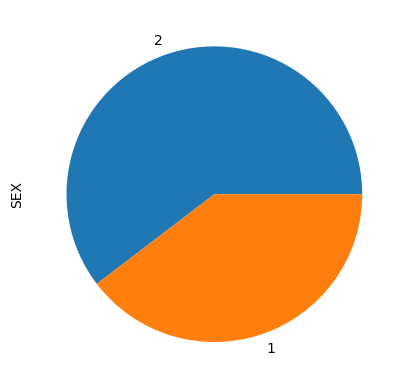

In [167]:
df['SEX'].value_counts().plot(kind='pie')


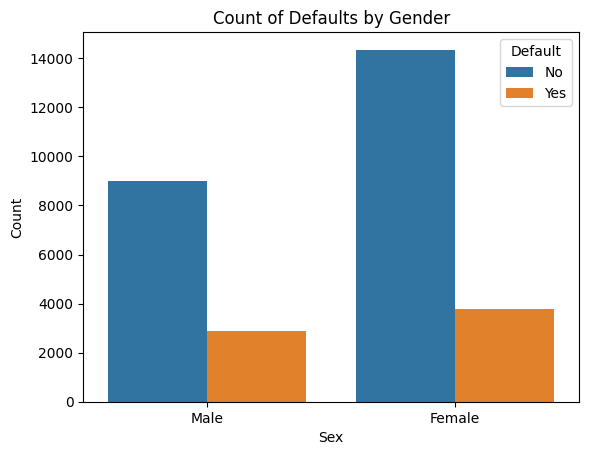

In [168]:
sns.countplot(x='SEX', hue='default', data=df)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Count of Defaults by Gender')
plt.legend(title='Default', labels=['No', 'Yes'])
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.show()

<AxesSubplot:ylabel='EDUCATION'>

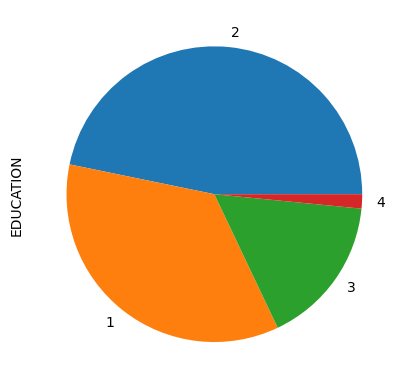

In [342]:
df['EDUCATION'].value_counts().plot(kind='pie')


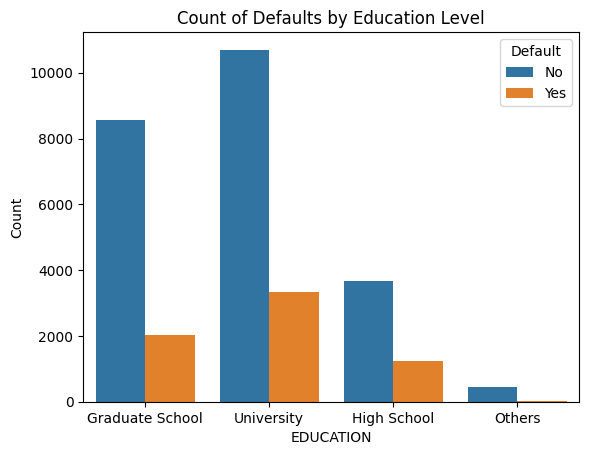

In [170]:
sns.countplot(x='EDUCATION', hue='default', data=df)
plt.xlabel('EDUCATION')
plt.ylabel('Count')
plt.title('Count of Defaults by Education Level')
plt.legend(title='Default', labels=['No', 'Yes'])
plt.xticks(ticks=[0,1,2,3], labels=['Graduate School','University','High School','Others'])
plt.show()

<AxesSubplot:ylabel='MARRIAGE'>

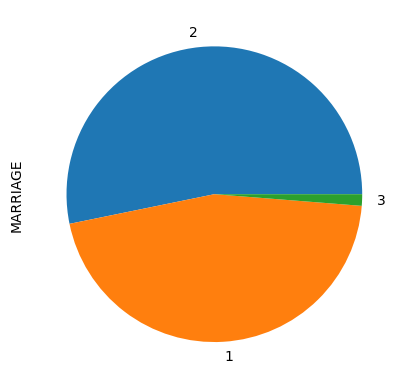

In [171]:
df['MARRIAGE'].value_counts().plot(kind='pie')

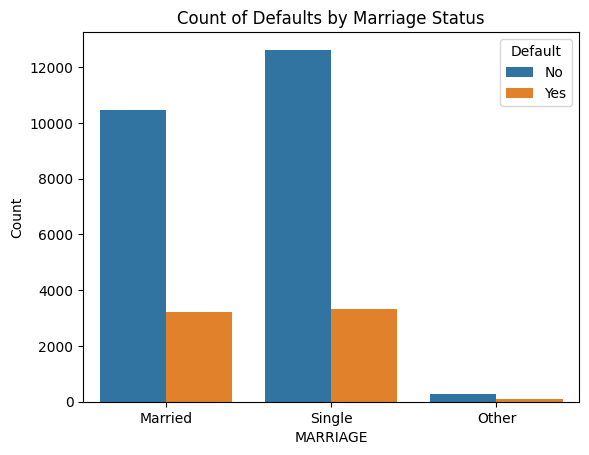

In [172]:
sns.countplot(x='MARRIAGE', hue='default', data=df)
plt.xlabel('MARRIAGE')
plt.ylabel('Count')
plt.title('Count of Defaults by Marriage Status')
plt.legend(title='Default', labels=['No', 'Yes'])
plt.xticks(ticks=[0,1,2], labels=['Married','Single','Other'])
plt.show()

In [173]:
# numeric feature exploration

In [174]:
# Limit Balance - credit in dollars 

In [356]:
df['LIMIT_BAL'].mean()

167484.32266666667

In [357]:
df['LIMIT_BAL'].median()

140000.0

In [175]:
df['LIMIT_BAL'].min()

10000.0

In [176]:
df['LIMIT_BAL'].max()

1000000.0

D:\apps\anocado\envs\dsc80\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


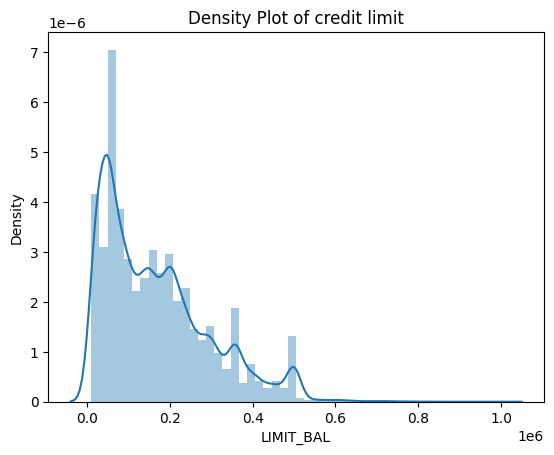

In [361]:
plt.title('Density Plot of credit limit')
sns.distplot(df['LIMIT_BAL'])
plt.show()

([<matplotlib.axis.XTick at 0x183f56820d0>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

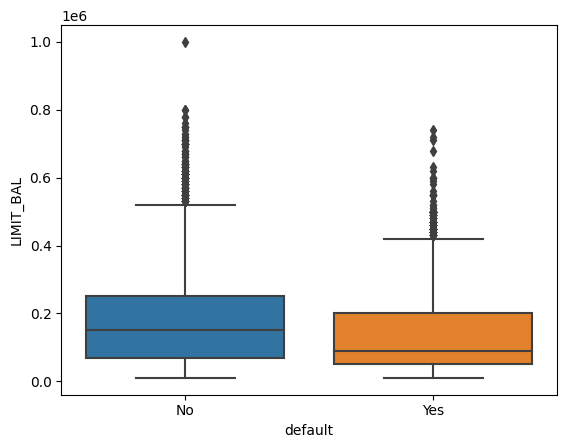

In [177]:
sns.boxplot(x='default', y='LIMIT_BAL', data=df)
plt.xticks(ticks=[0,1], labels=['No','Yes'])

(array([5.127e+03, 8.261e+03, 6.514e+03, 4.812e+03, 2.606e+03, 1.836e+03,
        6.280e+02, 1.710e+02, 4.000e+01, 5.000e+00]),
 array([21. , 26.8, 32.6, 38.4, 44.2, 50. , 55.8, 61.6, 67.4, 73.2, 79. ]),
 <BarContainer object of 10 artists>)

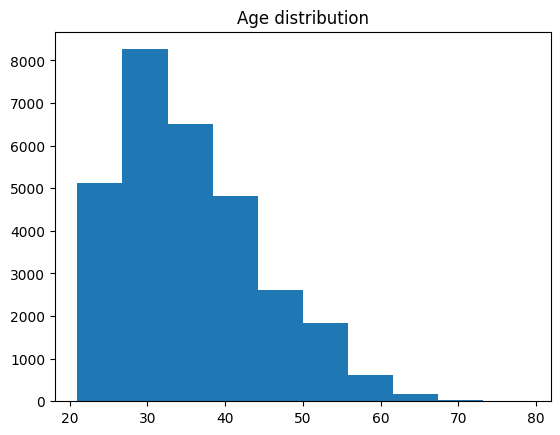

In [362]:
# AGE 
plt.title("Age distribution")
plt.hist(df['AGE'])

([<matplotlib.axis.XTick at 0x183fa2072e0>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

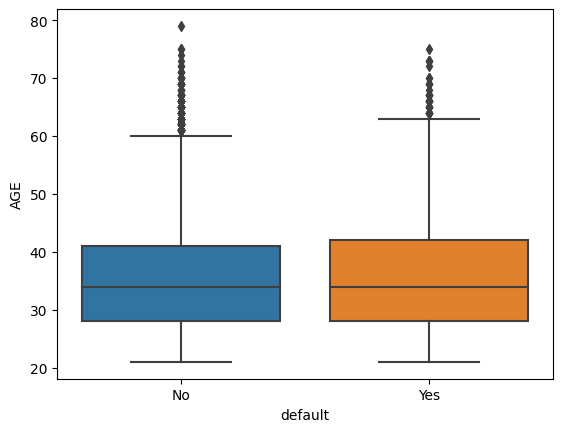

In [179]:
sns.boxplot(x='default', y='AGE', data=df)
plt.xticks(ticks=[0,1], labels=['No','Yes'])

In [180]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEPT',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR', 'default'],
      dtype='object')

In [181]:
# Bill Amount 
bill_df = df[['BILL_AMT_SEPT','BILL_AMT_AUG','BILL_AMT_JUL','BILL_AMT_JUN','BILL_AMT_MAY','BILL_AMT_APR']]
bill_df

,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR
0,3913.0,3102.0,689.0,0.0,0.0,0.0
1,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0
2,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0
3,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0
4,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0
...,...,...,...,...,...,...
29995,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0
29996,1683.0,1828.0,3502.0,8979.0,5190.0,0.0
29997,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0
29998,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0


In [182]:
bill_df.describe()

,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [194]:
# Payment 


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
21753,21754,80000.0,2,2,2,24,0,0,0,0,...,78321.0,73731.0,39643.0,39457.0,3503.0,5001.0,2092.0,1218.0,1445.0,878.0
251,252,30000.0,1,2,2,28,0,0,0,0,...,29155.0,25255.0,22001.0,0.0,5006.0,1244.0,851.0,955.0,0.0,0.0
22941,22942,180000.0,2,5,1,44,0,0,-1,-1,...,850.0,0.0,6881.0,10340.0,0.0,850.0,0.0,6881.0,10340.0,182.0
618,619,60000.0,1,1,2,25,0,0,0,0,...,38533.0,39639.0,39619.0,39140.0,2018.0,1900.0,2000.0,1500.0,1900.0,2000.0
17090,17091,130000.0,2,2,2,25,0,0,0,0,...,114734.0,117823.0,120854.0,123904.0,4100.0,4200.0,5000.0,5000.0,5000.0,10700.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,29803,50000.0,1,2,2,32,0,0,0,0,...,55739.0,55957.0,29238.0,6119.0,2000.0,3000.0,1591.0,72.0,1134.0,73421.0
5390,5391,200000.0,1,1,2,37,2,2,2,2,...,168386.0,164182.0,169029.0,172084.0,13500.0,6000.0,0.0,7500.0,6000.0,4000.0
860,861,50000.0,1,1,2,26,-2,-2,-2,-2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15795,15796,70000.0,2,2,2,25,0,0,0,0,...,51152.0,35122.0,28633.0,28039.0,3000.0,2000.0,4500.0,1200.0,0.0,1200.0


In [ ]:
# Pay status 

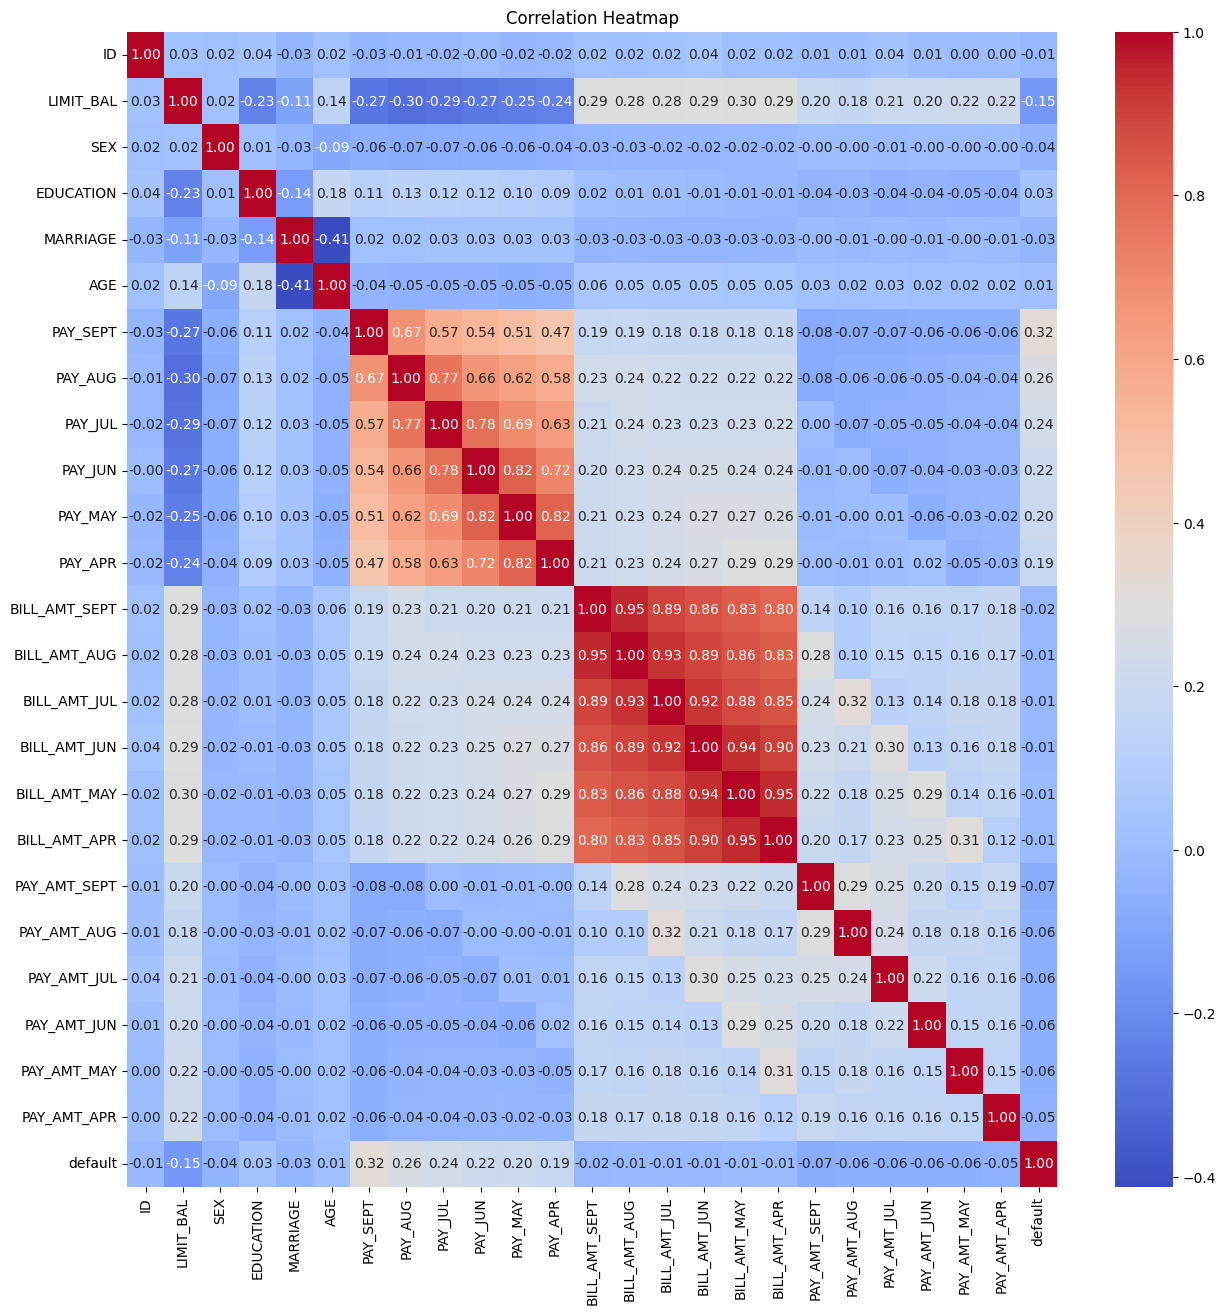

In [365]:
correlation_matrix = df.corr()
plt.figure(figsize=(15,15))  # Adjust the figure size if necessary
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Oversampling to tackle imbalanced dataset 

In [276]:
from imblearn.over_sampling import SMOTE 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Applying SMOTE only to the training data
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(X_train,y_train)


In [277]:
x_smote

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR
0,21754,80000.000000,2,2,2,24,0,0,0,0,...,78321.000000,73731.000000,39643.000000,39457.000000,3503.000000,5001.000000,2092.000000,1218.000000,1445.000000,878.000000
1,252,30000.000000,1,2,2,28,0,0,0,0,...,29155.000000,25255.000000,22001.000000,0.000000,5006.000000,1244.000000,851.000000,955.000000,0.000000,0.000000
2,22942,180000.000000,2,5,1,44,0,0,-1,-1,...,850.000000,0.000000,6881.000000,10340.000000,0.000000,850.000000,0.000000,6881.000000,10340.000000,182.000000
3,619,60000.000000,1,1,2,25,0,0,0,0,...,38533.000000,39639.000000,39619.000000,39140.000000,2018.000000,1900.000000,2000.000000,1500.000000,1900.000000,2000.000000
4,17091,130000.000000,2,2,2,25,0,0,0,0,...,114734.000000,117823.000000,120854.000000,123904.000000,4100.000000,4200.000000,5000.000000,5000.000000,5000.000000,10700.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37349,8184,366638.003934,2,2,1,29,3,2,1,0,...,367228.065133,310874.894867,317953.449843,267643.461062,672.399213,739.639135,10084.962363,10986.552016,9730.502395,9661.581476
37350,24759,90000.000000,1,1,1,34,2,2,1,0,...,90265.559082,90921.212145,90905.157388,88656.593820,2585.465139,1305.040139,3500.894404,5549.741503,1371.627889,7079.583831
37351,20480,50630.201252,2,2,1,25,0,0,0,0,...,51546.996758,9074.551015,8972.684078,47590.453377,1907.647906,2321.384097,1122.064230,804.671811,40645.309782,2047.424347
37352,28292,50000.000000,1,3,1,29,2,1,0,0,...,50440.117108,43632.708485,14551.737778,8886.328176,563.701443,2139.628284,1913.118088,1582.570230,858.283839,1123.141236


In [278]:
y_smote

0        0
1        0
2        0
3        0
4        0
        ..
37349    1
37350    1
37351    1
37352    1
37353    1
Name: default, Length: 37354, dtype: int64

In [321]:
columns = df.columns

In [322]:
tdf = pd.DataFrame(X_test,columns=columns)
tdf['default'] = y_test

In [323]:
bdf = pd.DataFrame(x_smote, columns=columns)
bdf['default']=y_smote

D:\apps\anocado\envs\dsc80\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='default', ylabel='count'>

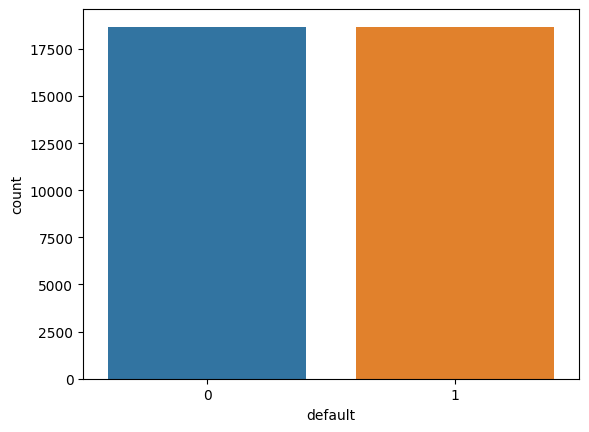

In [324]:
sns.countplot('default',data=bdf)

In [325]:
# Feature engineering 

In [326]:
# create a feature - total payment 

In [327]:
bdf['PAY_STATUS'] = bdf['PAY_SEPT']+ bdf['PAY_AUG']+ bdf['PAY_JUL']+ bdf['PAY_JUN']+ bdf['PAY_MAY']+ bdf['PAY_APR']
tdf['PAY_STATUS'] = tdf['PAY_SEPT']+ tdf['PAY_AUG']+ tdf['PAY_JUL']+ tdf['PAY_JUN']+ tdf['PAY_MAY']+ tdf['PAY_APR']

In [328]:
bdf.groupby('default')['PAY_STATUS'].mean()

default
0   -1.986668
1    1.712588
Name: PAY_STATUS, dtype: float64

In [329]:
# create a feature -total bills 


In [330]:
bdf['TOTAL_BILL'] = bdf['BILL_AMT_SEPT']+ bdf['BILL_AMT_AUG']+  bdf['BILL_AMT_JUL']+  bdf['BILL_AMT_JUN']+  bdf['BILL_AMT_MAY']+ bdf['BILL_AMT_APR']
bdf.groupby('default')['TOTAL_BILL'].mean()

default
0    271125.704771
1    257623.434320
Name: TOTAL_BILL, dtype: float64

In [331]:
tdf['TOTAL_BILL'] = tdf['BILL_AMT_SEPT']+ tdf['BILL_AMT_AUG']+  tdf['BILL_AMT_JUL']+  tdf['BILL_AMT_JUN']+  tdf['BILL_AMT_MAY']+ tdf['BILL_AMT_APR']


In [332]:
# create a feature-TOTAL PAY 
bdf['TOTAL_PAY'] = bdf['PAY_AMT_SEPT']+ bdf['PAY_AMT_AUG']+  bdf['PAY_AMT_JUL']+  bdf['PAY_AMT_JUN']+  bdf['PAY_AMT_MAY']+ bdf['PAY_AMT_APR']
bdf.groupby('default')['TOTAL_PAY'].mean()

default
0    35022.628099
1    18423.825078
Name: TOTAL_PAY, dtype: float64

In [333]:
tdf['TOTAL_PAY'] = tdf['PAY_AMT_SEPT']+ tdf['PAY_AMT_AUG']+  tdf['PAY_AMT_JUL']+  tdf['PAY_AMT_JUN']+  tdf['PAY_AMT_MAY']+ tdf['PAY_AMT_APR']

In [334]:
# Create a feature - EXP_PAY
bdf['EXP_PAY'] = bdf['PAY_SEPT']* bdf['PAY_AMT_SEPT']+bdf['PAY_AUG']* bdf['PAY_AMT_AUG']+ bdf['PAY_JUL']*bdf['PAY_AMT_JUL']+ bdf['PAY_JUN']* bdf['PAY_AMT_JUN']+ bdf['PAY_MAY']* bdf['PAY_AMT_MAY']+bdf['PAY_APR']* bdf['PAY_AMT_APR']
bdf.groupby('default')['EXP_PAY'].mean()
tdf['EXP_PAY'] = tdf['PAY_SEPT']* tdf['PAY_AMT_SEPT']+tdf['PAY_AUG']* tdf['PAY_AMT_AUG']+ tdf['PAY_JUL']*tdf['PAY_AMT_JUL']+ tdf['PAY_JUN']* tdf['PAY_AMT_JUN']+ tdf['PAY_MAY']* tdf['PAY_AMT_MAY']+tdf['PAY_APR']* tdf['PAY_AMT_APR']

In [335]:
# Modelling 
bdf = bdf.iloc[:,1:]
tdf = tdf.iloc[:,1:]

In [292]:
# baseline model 1 logistic regression using only LIMIT_BAL feature 

Training Performance:
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67     18677
           1       1.00      0.00      0.00     18677

    accuracy                           0.50     37354
   macro avg       0.75      0.50      0.33     37354
weighted avg       0.75      0.50      0.33     37354


Confusion Matrix:
[[18677     0]
 [18677     0]]

Testing Performance:
Classification Report:
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4687
           1       1.00      0.00      0.00      1313

    accuracy                           0.78      6000
   macro avg       0.89      0.50      0.44      6000
weighted avg       0.83      0.78      0.69      6000


Confusion Matrix:
[[4687    0]
 [1313    0]]


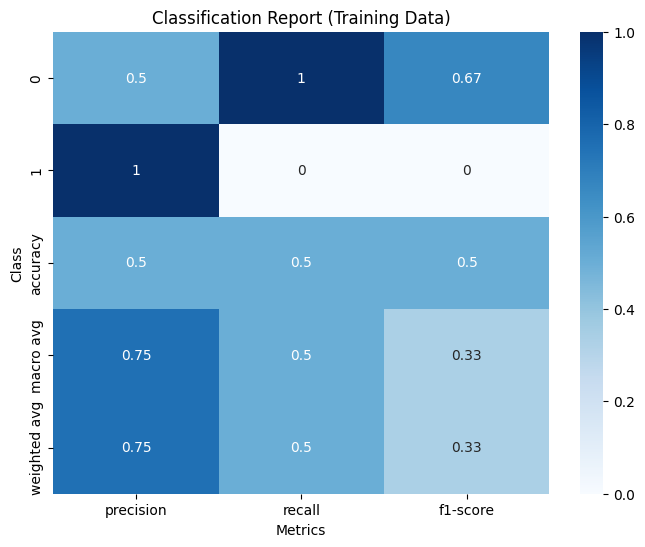

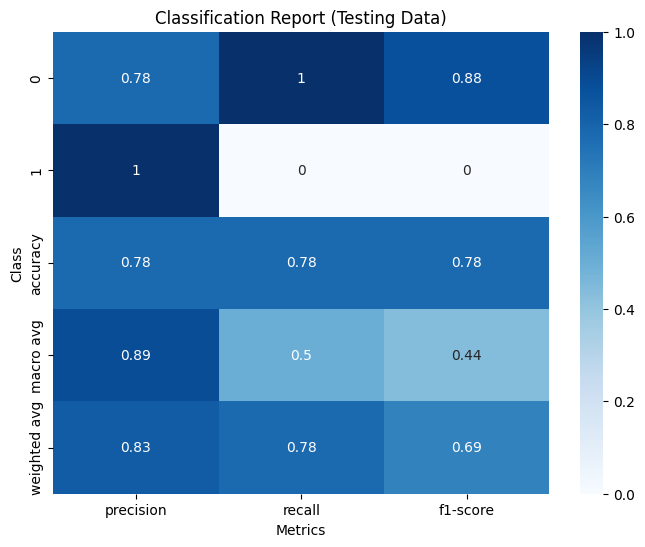

In [373]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

X_train = bdf[['LIMIT_BAL']]
y_train = bdf['default']

# Initializing and training the logistic regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

# Making predictions on the testing set
y_train_pred = logistic_model.predict(X_train)
y_test_pred = logistic_model.predict(X_test[['LIMIT_BAL']])

# Evaluating the model's performance on training data
print("Training Performance:")
print("Classification Report:")
print(classification_report(y_train, y_train_pred, zero_division=1))  # Set zero_division=1
print("\nConfusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))

# Evaluating the model's performance on testing data
print("\nTesting Performance:")
print("Classification Report:")
print(classification_report(y_test, y_test_pred, zero_division=1))  # Set zero_division=1
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

# Plot classification report for training data
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(classification_report(y_train, y_train_pred, zero_division=1, output_dict=True)).iloc[:-1, :].T, annot=True, cmap='Blues')
plt.title('Classification Report (Training Data)')
plt.xlabel('Metrics')
plt.ylabel('Class')
plt.show()

# Plot classification report for testing data
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(classification_report(y_test, y_test_pred, zero_division=1, output_dict=True)).iloc[:-1, :].T, annot=True, cmap='Blues')
plt.title('Classification Report (Testing Data)')
plt.xlabel('Metrics')
plt.ylabel('Class')
plt.show()

In [366]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEPT',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR', 'default'],
      dtype='object')

In [ ]:
# baseline model2: logistic regression using only categorical features, age and limit balance 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

X_train = bdf[['SEX','EDUCATION','MARRIAGE','LIMIT_BAL','AGE']]
y_train = bdf[['default']]
X_test = tdf[['SEX','EDUCATION','MARRIAGE','LIMIT_BAL','AGE']]
y_test = tdf[['default']]

# Initializing and training the logistic regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

# Making predictions on the testing set
y_train_pred = logistic_model.predict(X_train)
y_test_pred = logistic_model.predict(X_test)

# Evaluating the model's performance on training data
print("Training Performance:")
print("Classification Report:")
print(classification_report(y_train, y_train_pred, zero_division=1))  # Set zero_division=1
print("\nConfusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))

# Evaluating the model's performance on testing data
print("\nTesting Performance:")
print("Classification Report:")
print(classification_report(y_test, y_test_pred, zero_division=1))  # Set zero_division=1
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

# Plot classification report for training data
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(classification_report(y_train, y_train_pred, zero_division=1, output_dict=True)).iloc[:-1, :].T, annot=True, cmap='Blues')
plt.title('Classification Report (Training Data)')
plt.xlabel('Metrics')
plt.ylabel('Class')
plt.show()

# Plot classification report for testing data
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(classification_report(y_test, y_test_pred, zero_division=1, output_dict=True)).iloc[:-1, :].T, annot=True, cmap='Blues')
plt.title('Classification Report (Testing Data)')
plt.xlabel('Metrics')
plt.ylabel('Class')
plt.show()

D:\apps\anocado\envs\dsc80\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Training Performance:
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.78      0.65     18677
           1       0.62      0.36      0.46     18677

    accuracy                           0.57     37354
   macro avg       0.59      0.57      0.55     37354
weighted avg       0.59      0.57      0.55     37354


Confusion Matrix:
[[14641  4036]
 [11955  6722]]

Testing Performance:
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.78      0.80      4687
           1       0.32      0.36      0.34      1313

    accuracy                           0.69      6000
   macro avg       0.56      0.57      0.57      6000
weighted avg       0.70      0.69      0.70      6000


Confusion Matrix:
[[3663 1024]
 [ 840  473]]


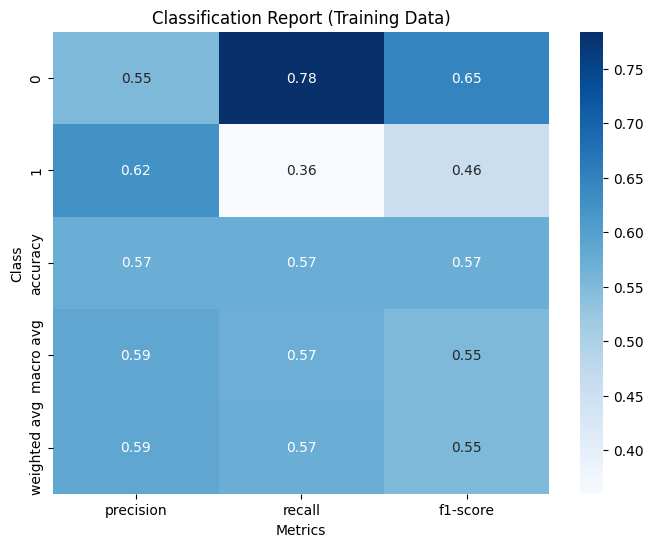

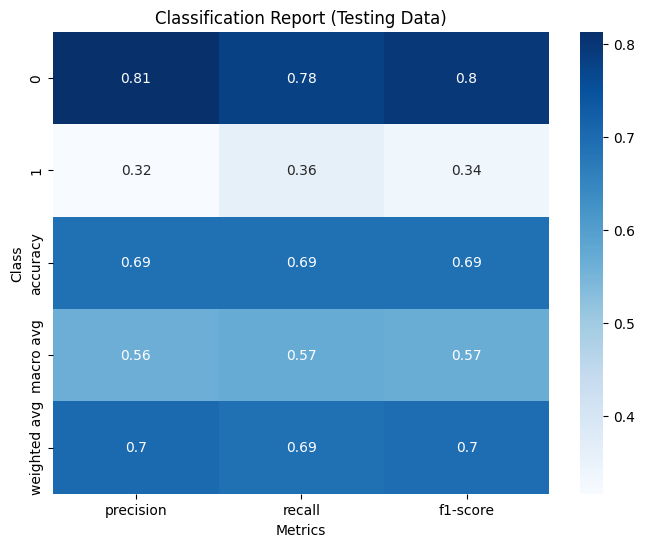

In [379]:
# baseline model3: logistic regression using quantitative data 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

columns = ['LIMIT_BAL', 'PAY_SEPT',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR']

X_train = bdf[columns]
y_train = bdf[['default']]
X_test = tdf[columns]
y_test = tdf[['default']]

# Initializing and training the logistic regression model
logistic_model = LogisticRegression(random_state=42)
logistic_model.fit(X_train, y_train)

# Making predictions on the testing set
y_train_pred = logistic_model.predict(X_train)
y_test_pred = logistic_model.predict(X_test)

# Evaluating the model's performance on training data
print("Training Performance:")
print("Classification Report:")
print(classification_report(y_train, y_train_pred, zero_division=1))  # Set zero_division=1
print("\nConfusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))

# Evaluating the model's performance on testing data
print("\nTesting Performance:")
print("Classification Report:")
print(classification_report(y_test, y_test_pred, zero_division=1))  # Set zero_division=1
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

# Plot classification report for training data
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(classification_report(y_train, y_train_pred, zero_division=1, output_dict=True)).iloc[:-1, :].T, annot=True, cmap='Blues')
plt.title('Classification Report (Training Data)')
plt.xlabel('Metrics')
plt.ylabel('Class')
plt.show()

# Plot classification report for testing data
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(classification_report(y_test, y_test_pred, zero_division=1, output_dict=True)).iloc[:-1, :].T, annot=True, cmap='Blues')
plt.title('Classification Report (Testing Data)')
plt.xlabel('Metrics')
plt.ylabel('Class')
plt.show()

In [ ]:
# my models: 
# 1. xgboost 
# 2. random forest tree 

Training Performance:
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     18677
           1       0.92      0.87      0.89     18677

    accuracy                           0.90     37354
   macro avg       0.90      0.90      0.90     37354
weighted avg       0.90      0.90      0.90     37354


Confusion Matrix:
[[17257  1420]
 [ 2442 16235]]

Testing Performance:
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      4687
           1       0.49      0.46      0.48      1313

    accuracy                           0.78      6000
   macro avg       0.67      0.66      0.67      6000
weighted avg       0.77      0.78      0.78      6000


Confusion Matrix:
[[4059  628]
 [ 705  608]]


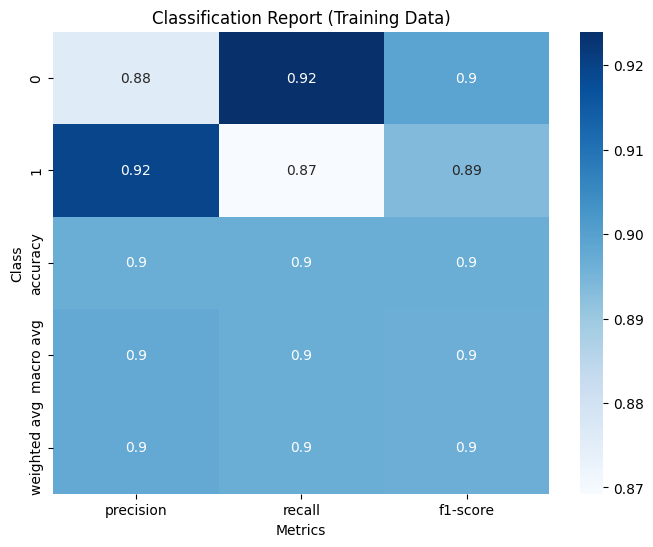

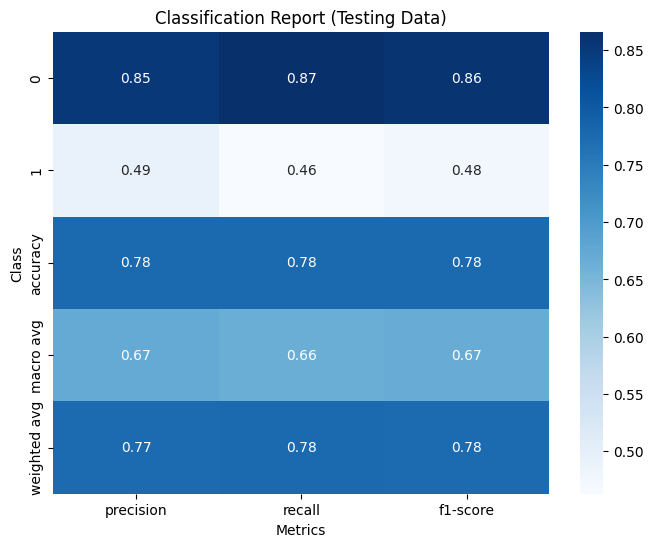

In [380]:
# Model: xgboost with same features as baseline model3 
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

columns = ['LIMIT_BAL', 'PAY_SEPT',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR']

X_train = bdf[columns]
y_train = bdf[['default']]
X_test = tdf[columns]
y_test = tdf[['default']]
# Initializing and training the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train)

# Making predictions on the training and testing sets
y_train_pred = xgb_classifier.predict(X_train)
y_test_pred = xgb_classifier.predict(X_test)

# Evaluating the model's performance on training data
print("Training Performance:")
print("Classification Report:")
print(classification_report(y_train, y_train_pred, zero_division=1))  # Set zero_division=1
print("\nConfusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))

# Evaluating the model's performance on testing data
print("\nTesting Performance:")
print("Classification Report:")
print(classification_report(y_test, y_test_pred, zero_division=1))  # Set zero_division=1
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

# Plot classification report for training data
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(classification_report(y_train, y_train_pred, zero_division=1, output_dict=True)).iloc[:-1, :].T, annot=True, cmap='Blues')
plt.title('Classification Report (Training Data)')
plt.xlabel('Metrics')
plt.ylabel('Class')
plt.show()

# Plot classification report for testing data
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(classification_report(y_test, y_test_pred, zero_division=1, output_dict=True)).iloc[:-1, :].T, annot=True, cmap='Blues')
plt.title('Classification Report (Testing Data)')
plt.xlabel('Metrics')
plt.ylabel('Class')
plt.show()

In [319]:
X_train.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEPT',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR', 'PAY_STATUS', 'TOTAL_BILL',
       'TOTAL_PAY', 'EXP_PAY'],
      dtype='object')

In [320]:
X_test.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEPT',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR', 'PAY_STATUS', 'TOTAL_BILL',
       'EXP_PAY', 'TOTAL_PAY'],
      dtype='object')

Training Performance:
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     18677
           1       0.92      0.88      0.90     18677

    accuracy                           0.90     37354
   macro avg       0.90      0.90      0.90     37354
weighted avg       0.90      0.90      0.90     37354


Confusion Matrix:
[[17243  1434]
 [ 2287 16390]]

Testing Performance:
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      4687
           1       0.48      0.46      0.47      1313

    accuracy                           0.77      6000
   macro avg       0.66      0.66      0.66      6000
weighted avg       0.77      0.77      0.77      6000


Confusion Matrix:
[[4022  665]
 [ 708  605]]


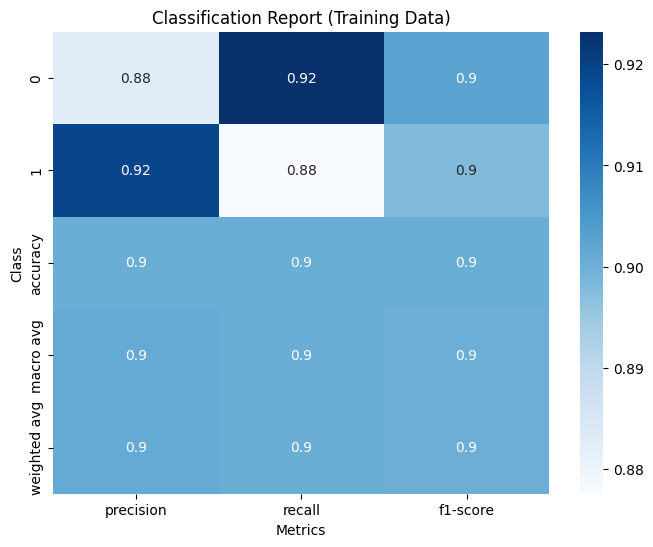

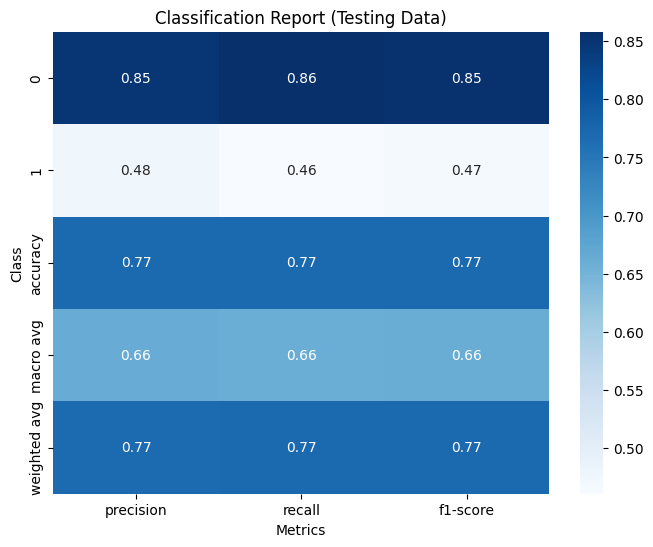

In [381]:
# 2 xgboost with all features in original dataframe 
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


X_train = bdf.iloc[:,:-5]
y_train = bdf[['default']]
X_test = tdf.iloc[:,:-5]
y_test = tdf[['default']]
# Initializing and training the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train)

# Making predictions on the training and testing sets
y_train_pred = xgb_classifier.predict(X_train)
y_test_pred = xgb_classifier.predict(X_test)

# Evaluating the model's performance on training data
print("Training Performance:")
print("Classification Report:")
print(classification_report(y_train, y_train_pred, zero_division=1))  # Set zero_division=1
print("\nConfusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))

# Evaluating the model's performance on testing data
print("\nTesting Performance:")
print("Classification Report:")
print(classification_report(y_test, y_test_pred, zero_division=1))  # Set zero_division=1
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

# Plot classification report for training data
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(classification_report(y_train, y_train_pred, zero_division=1, output_dict=True)).iloc[:-1, :].T, annot=True, cmap='Blues')
plt.title('Classification Report (Training Data)')
plt.xlabel('Metrics')
plt.ylabel('Class')
plt.show()

# Plot classification report for testing data
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(classification_report(y_test, y_test_pred, zero_division=1, output_dict=True)).iloc[:-1, :].T, annot=True, cmap='Blues')
plt.title('Classification Report (Testing Data)')
plt.xlabel('Metrics')
plt.ylabel('Class')
plt.show()

Training Performance:
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90     18677
           1       0.92      0.87      0.90     18677

    accuracy                           0.90     37354
   macro avg       0.90      0.90      0.90     37354
weighted avg       0.90      0.90      0.90     37354


Confusion Matrix:
[[17252  1425]
 [ 2343 16334]]

Testing Performance:
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      4687
           1       0.48      0.47      0.48      1313

    accuracy                           0.77      6000
   macro avg       0.67      0.66      0.67      6000
weighted avg       0.77      0.77      0.77      6000


Confusion Matrix:
[[4032  655]
 [ 700  613]]


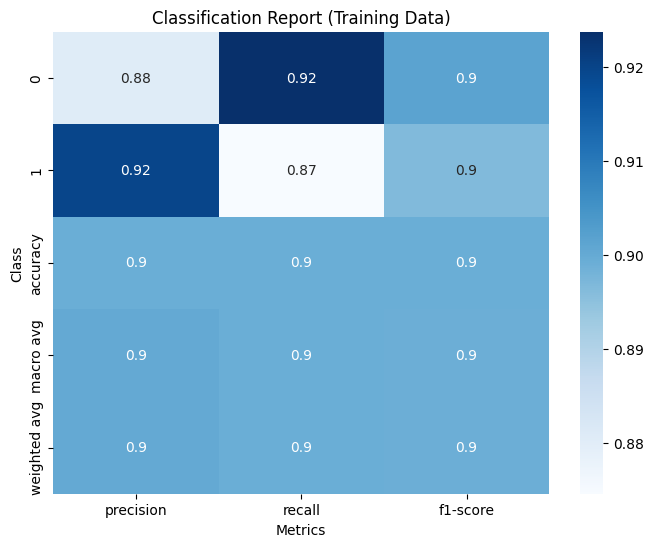

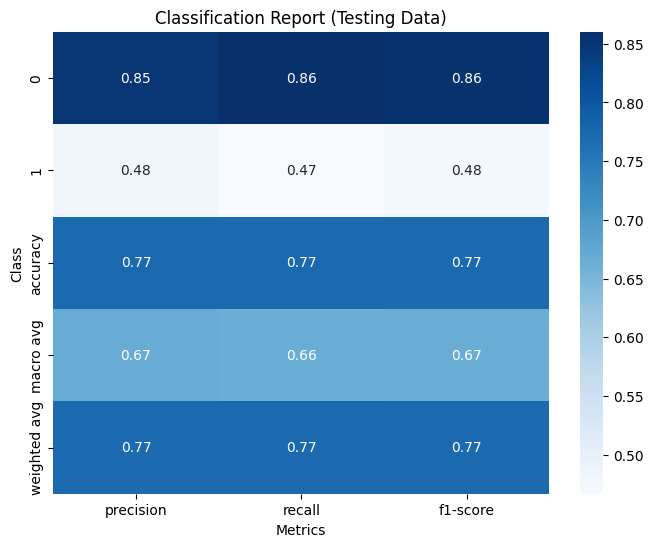

In [376]:
# 3 xgboost with all features and engineered features 
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

X_train = bdf.drop(columns=['default'])
y_train = bdf['default']
X_test = tdf.drop(columns=['default'])
y_test = tdf['default']

# Initializing and training the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train)

# Making predictions on the training and testing sets
y_train_pred = xgb_classifier.predict(X_train)
y_test_pred = xgb_classifier.predict(X_test)

# Evaluating the model's performance on training data
print("Training Performance:")
print("Classification Report:")
print(classification_report(y_train, y_train_pred, zero_division=1))  # Set zero_division=1
print("\nConfusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))

# Evaluating the model's performance on testing data
print("\nTesting Performance:")
print("Classification Report:")
print(classification_report(y_test, y_test_pred, zero_division=1))  # Set zero_division=1
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

# Plot classification report for training data
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(classification_report(y_train, y_train_pred, zero_division=1, output_dict=True)).iloc[:-1, :].T, annot=True, cmap='Blues')
plt.title('Classification Report (Training Data)')
plt.xlabel('Metrics')
plt.ylabel('Class')
plt.show()

# Plot classification report for testing data
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(classification_report(y_test, y_test_pred, zero_division=1, output_dict=True)).iloc[:-1, :].T, annot=True, cmap='Blues')
plt.title('Classification Report (Testing Data)')
plt.xlabel('Metrics')
plt.ylabel('Class')
plt.show()

In [346]:
# xgboost: gridsearchcv
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Assuming X_train, y_train, X_test, y_test are already defined

# Initializing the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)

# Define a grid of hyperparameters to search over
param_grid = {
    'n_estimators': [350,400,450],  # Number of trees in the forest
    'max_depth': [15,17,19],             # Maximum depth of each tree
    'learning_rate': [0.29, 0.3,0.31]# Learning rate
}

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Making predictions on the testing set with the best estimator
y_test_pred = best_estimator.predict(X_test)

# Evaluating the model's performance on testing data
print("Testing Performance with Best Estimator:")
print("Classification Report:")
print(classification_report(y_test, y_test_pred, zero_division=1))  # Set zero_division=1
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

Testing Performance with Best Estimator:
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      4687
           1       0.50      0.44      0.47      1313

    accuracy                           0.78      6000
   macro avg       0.67      0.66      0.66      6000
weighted avg       0.77      0.78      0.78      6000


Confusion Matrix:
[[4098  589]
 [ 731  582]]


In [348]:
best_params

{'learning_rate': 0.3, 'max_depth': 15, 'n_estimators': 450}

C:\Users\CiciA\AppData\Local\Temp\ipykernel_20168\1062955008.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_classifier.fit(X_train, y_train)


Training Performance:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18677
           1       1.00      1.00      1.00     18677

    accuracy                           1.00     37354
   macro avg       1.00      1.00      1.00     37354
weighted avg       1.00      1.00      1.00     37354


Confusion Matrix:
[[18668     9]
 [   11 18666]]

Testing Performance:
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.87      0.86      4687
           1       0.50      0.48      0.49      1313

    accuracy                           0.78      6000
   macro avg       0.68      0.67      0.68      6000
weighted avg       0.78      0.78      0.78      6000


Confusion Matrix:
[[4057  630]
 [ 677  636]]


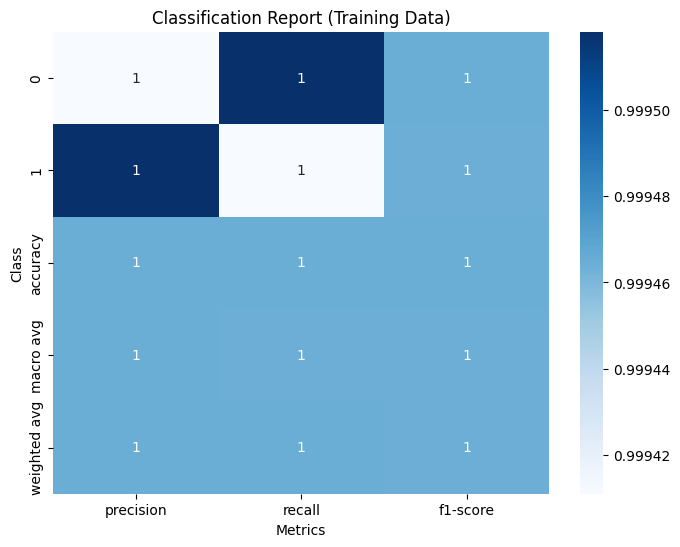

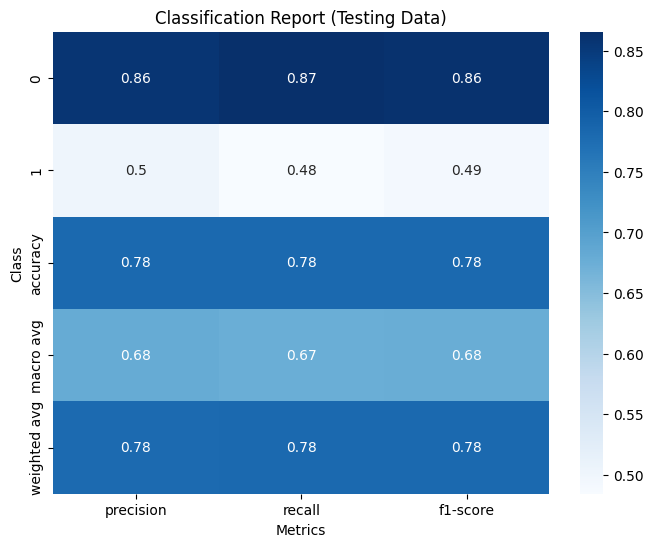

In [382]:

# random forest tree witha all features from original 

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

X_train = bdf.iloc[:,:-5]
y_train = bdf[['default']]
X_test = tdf.iloc[:,:-5]
y_test = tdf[['default']]
# Initializing and training the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(random_state=42)
xgb_classifier.fit(X_train, y_train)

# Initializing and training the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Making predictions on the training and testing sets
y_train_pred = rf_classifier.predict(X_train)
y_test_pred = rf_classifier.predict(X_test)

# Evaluating the model's performance on training data
print("Training Performance:")
print("Classification Report:")
print(classification_report(y_train, y_train_pred, zero_division=1))  # Set zero_division=1
print("\nConfusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))

# Evaluating the model's performance on testing data
print("\nTesting Performance:")
print("Classification Report:")
print(classification_report(y_test, y_test_pred, zero_division=1))  # Set zero_division=1
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

# Plot classification report for training data
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(classification_report(y_train, y_train_pred, zero_division=1, output_dict=True)).iloc[:-1, :].T, annot=True, cmap='Blues')
plt.title('Classification Report (Training Data)')
plt.xlabel('Metrics')
plt.ylabel('Class')
plt.show()

# Plot classification report for testing data
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(classification_report(y_test, y_test_pred, zero_division=1, output_dict=True)).iloc[:-1, :].T, annot=True, cmap='Blues')
plt.title('Classification Report (Testing Data)')
plt.xlabel('Metrics')
plt.ylabel('Class')
plt.show()





Training Performance:
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18677
           1       1.00      1.00      1.00     18677

    accuracy                           1.00     37354
   macro avg       1.00      1.00      1.00     37354
weighted avg       1.00      1.00      1.00     37354


Confusion Matrix:
[[18669     8]
 [   12 18665]]

Testing Performance:
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      4687
           1       0.50      0.49      0.50      1313

    accuracy                           0.78      6000
   macro avg       0.68      0.68      0.68      6000
weighted avg       0.78      0.78      0.78      6000


Confusion Matrix:
[[4038  649]
 [ 667  646]]


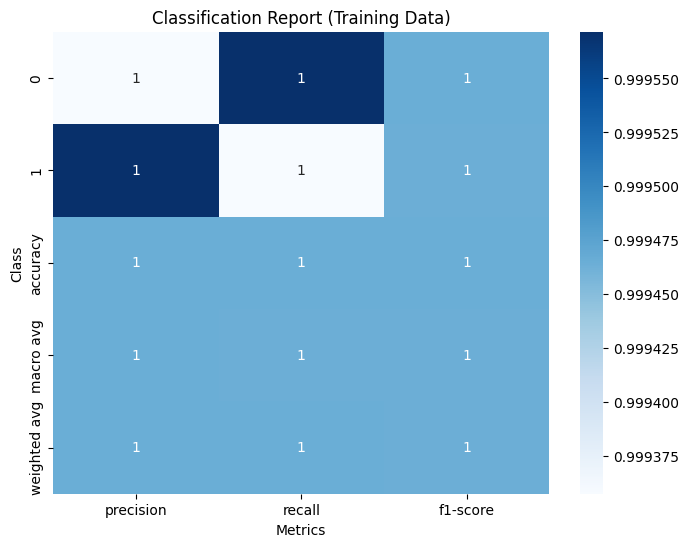

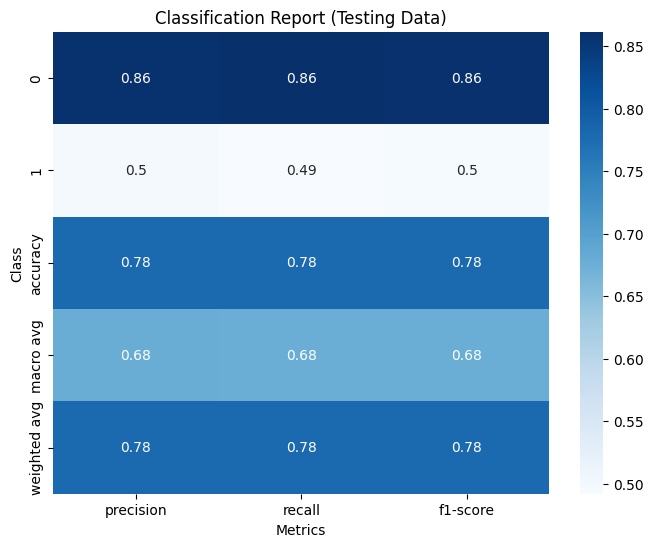

In [377]:
# random forest tree with all features and engineered features 

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

X_train = bdf.drop(columns=['default'])
y_train = bdf['default']
X_test = tdf.drop(columns=['default'])
y_test = tdf['default']

# Initializing and training the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Making predictions on the training and testing sets
y_train_pred = rf_classifier.predict(X_train)
y_test_pred = rf_classifier.predict(X_test)

# Evaluating the model's performance on training data
print("Training Performance:")
print("Classification Report:")
print(classification_report(y_train, y_train_pred, zero_division=1))  # Set zero_division=1
print("\nConfusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))

# Evaluating the model's performance on testing data
print("\nTesting Performance:")
print("Classification Report:")
print(classification_report(y_test, y_test_pred, zero_division=1))  # Set zero_division=1
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

# Plot classification report for training data
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(classification_report(y_train, y_train_pred, zero_division=1, output_dict=True)).iloc[:-1, :].T, annot=True, cmap='Blues')
plt.title('Classification Report (Training Data)')
plt.xlabel('Metrics')
plt.ylabel('Class')
plt.show()

# Plot classification report for testing data
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(classification_report(y_test, y_test_pred, zero_division=1, output_dict=True)).iloc[:-1, :].T, annot=True, cmap='Blues')
plt.title('Classification Report (Testing Data)')
plt.xlabel('Metrics')
plt.ylabel('Class')
plt.show()

In [378]:
# grid search cv on random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Assuming X_train, y_train, X_test, y_test are already defined

# Initializing the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define a grid of hyperparameters to search over
param_grid = {
    'n_estimators': [100, 200, 300],    # Number of trees in the forest
    'max_depth': [5, 10, 20],           # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],     # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],       # Minimum number of samples required at each leaf node
}

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Making predictions on the testing set with the best estimator
y_test_pred = best_estimator.predict(X_test)

# Evaluating the model's performance on testing data
print("Testing Performance with Best Estimator:")
print("Classification Report:")
print(classification_report(y_test, y_test_pred, zero_division=1))  # Set zero_division=1
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

# Plot classification report for training data
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(classification_report(y_train, y_train_pred, zero_division=1, output_dict=True)).iloc[:-1, :].T, annot=True, cmap='Blues')
plt.title('Classification Report (Training Data)')
plt.xlabel('Metrics')
plt.ylabel('Class')
plt.show()

# Plot classification report for testing data
plt.figure(figsize=(8, 6))
sns.heatmap(pd.DataFrame(classification_report(y_test, y_test_pred, zero_division=1, output_dict=True)).iloc[:-1, :].T, annot=True, cmap='Blues')
plt.title('Classification Report (Testing Data)')
plt.xlabel('Metrics')
plt.ylabel('Class')
plt.show()


KeyboardInterrupt: 

In [ ]:
# evaluation : use recall & f1-score: We want to prevent the case where you predict not default but actually defaults (FN)
